In [1]:
import numpy as np
from scipy.spatial import distance
import copy
import matplotlib.pyplot as plt
from IPython import display

np.set_printoptions(suppress=True)

In [2]:
# OPTIMIZE ALL TOGETHER WITH TRANSLATION ERROR ONLY bu EUCLIDEAN DISTANCE

In [1]:
from lib_robot_transformations import *

<class 'lib_robot_transformations.KUKA_frame'>
{'x': 0, 'y': 0, 'z': 0, 'a': 0, 'b': 0, 'c': 0}

In [3]:
import tensorflow as tf


2025-04-01 14:27:27.339579: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-01 14:27:27.370618: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-01 14:27:27.371281: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-01 14:27:27.890153: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Description of several Classes for Transformation matrices

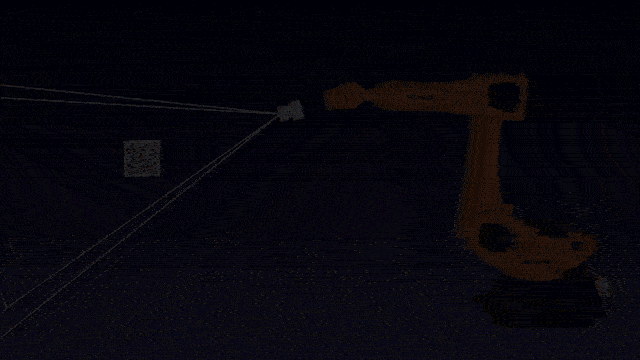

### Get positions of the Robot Flange in respect to Robot base (robot zero point)
### rf_1, rf_2,... rf_n

In [7]:
rob_frames_list =[
    
# [1764.02292, 0.0, 1761.52636, -180.0, 84.0, -180.0], 
# [1827.95246, -251.30155, 951.77186, -96.015, -84.623, -68.804],        
# [1931.05579, -967.23939, 1083.15431, -26.05476, 66.41021, -64.06251],  
# [1507.34363, -221.44925, 2067.93555, -164.93109, 66.19657, 180.0],     
# [2215.94371, 1052.15147, 1683.43226, 142.69729, 81.55418, -177.44157], 
# [2342.28769, 252.65205, 1452.60974, -100.15287, 75.10792, -94.09057],  
# [2487.90625, -383.43078, 1708.89868, 105.50976, -13.92187, 114.27994], 
# [2395.00814, 209.79634, 1867.01265, 56.18247, -31.0776, 129.40267],    
# [1904.86438, -596.74658, 1719.98706, 120.29778, 5.73364, 111.18403],
# [2101.76441, -451.72244, 1317.45581, 99.78435, -49.31644, 100.63018],
# [2322.09131, -181.78218, 1120.96753, 99.78435, -49.31644, 88.20804],
# [1970.31128, 236.77966, 1301.53845, 70.18229, -8.13688, 88.92815],
# [1922.16199, 351.10956, 1491.38354, 70.18229, -8.13688, 102.66333],
# [1902.10771, -92.65591, 1658.77306, 90.81134, -15.91346, 108.67867],
# [1673.39014, -857.09711, 1509.50867, 100.26297, -18.72506, 105.85829],
# [2439.25637, -848.14129, 1411.81488, 110.24204, -67.00715, 111.78587],
# [1946.1886, 206.64883, 595.28931, 96.03271, -48.1763, 70.45085],
# [2117.94053, 644.80012, 1266.82333, 53.45774, -64.46092, 99.69609],
# [2306.00586, 402.15448, 1736.193, 57.17004, -41.10065, 108.74191],
# [1561.31751, -241.4837, 974.88123, 85.13561, -70.208, 99.94567],


# CAM [-280.0000000000001, -50.0, 99.99999999999989, 14.999999999999977, 57.00000000000001, 75.00000000000001]
# [752.5400845736053, -580.9250499587338, 841.7992218366932, -179.09573297201527, 17.20169688784192, -172.1903653675719],
# [486.4010314039602, 286.63003563187965, 1406.4158944815422, -179.92614314385645, -25.433376710951084, -149.7828258550786],
# [641.512206997309, 286.8299860343481, 1332.6528305960587, 158.84944994479636, -11.849809720997756, -142.87970365006086],
# [413.8345273420368, 174.32092915459765, 1062.6915454681734, 167.51302196355766, 22.512862556618394, -157.20992975936161],
# [643.4463640638596, -337.6622828643302, 1387.5986611842764, -154.34813129653253, 2.5829440418829797, -148.4889590782045],
# [804.8935542591453, -114.45881027443798, 1317.936765933824, -174.50162629724963, -27.483957246364913, -143.9453773166216],
# [914.4150390075957, -359.64956680628853, 1482.339233223805, -131.84528852073635, -43.18675663081606, -169.6285849708982],
# [901.5388280114444, -469.50240480502424, 1089.911740541607, -125.88371588680191, -8.823912758182558, -172.36651101189707],
# [548.4299311558823, -224.94404602917035, 1033.0382070404667, 177.9651645726728, -4.697708325449265, -172.5164429335991],
# [760.4687474512817, -260.7284697527806, 799.8689073377668, -179.09573009022932, 17.201696564036222, -172.1903638151263],

#################################
# ROUNDED    
# [-27, -642.5, 1562.5, 18.7, -52.4, 175],
# [-105.6, -642.5, 1430.4, 18.7, -52.3, 175],
# [182.3, -642.5, 1533.8, 14.1, -36.4, -178.5],
# [229.1, -833.4, 1533.8, -3, -36.4, -178.5],
# [25.6, -833.4, 1636, -3.6, -46.7, -177.7],
# [-177.7, -810.1, 1636, -5.2, -61.7, -175.7],
# [-232, -892.8, 1636, -48.4, -61.7, -175.7],
# [-30.7, -1038.6, 1636.1, -47.7, -46.5, -178.7],
# [109.9, -1209.7, 1426.4, -46.2, -28, -178.7],
# [-152, -1313.4, 1426.4, -74.7, -28, -178.7],
# [-152, -1259.6, 1592.5, -74.2, -42.9, 179.8],
# [-202.5, -1039.2, 1692.2, -74.2, -52.5, 179.5],
# [-347.3, -1039.3, 1692.2, -95.6, -52.5, 179.5],
# [-282, -1238.3, 1536.1, -94.4, -39.1, 177.9],
# [-296.1, -1365.7, 1356.9, -93.7, -20.8, 176.4],
# [-605.2, -1368.1, 1356.9, -121.8, -20.8, 176.4],
# [-607.9, -1263.8, 1537.1, -123.9, -33.3, -178.4],
# [-472.2, -1079, 1763.8, -122, -51.4, -180],
# [-539.1, -965.7, 1763.8, -150.5, -51.4, -180],
# [-734.4, -1132.7, 1608.7, -145.7, -31.6, 175.4],
# [-924, -1119.6, 1451.6, -151.7, -21.8, -177.5],
# [-947.1, -884.2, 1511.5, -175.5, -21.8, -177.5],
# [-850.1, -894.5, 1560.9, -175.1, -31.2, -178.3],
# [-609.2, -851, 1699, -174, -45.9, 179.9],
# [-629.2, -653.1, 1744.4, 153.8, -45.9, 179.9],
# [-777.5, -491.6, 1578, 149.2, -29.4, -174.7],
# [-869.7, -510.8, 1480, 151.1, -22.7, -179],
# [-792.6, -429, 1447.6, 137.2, -23.1, 176.7],
# [-705.5, -440.5, 1590.5, 132.8, -28.5, 175.9],
# [-626.6, -526.9, 1691.1, 139.3, -43.1, 178],
# [-463.4, -463.7, 1717, 108.7, -43.1, 178],
# [-546, -297.7, 1517.5, 108.3, -25.6, 178.5],
# [-551, -270.5, 1398.8, 109.3, -22.3, 173.2],
# [-530.7, -569.6, 1699.6, 140.9, -49.2, -176.2],
# [-575.6, -753, 1794.3, 174.8, -50.6, -176],
# [-565.3, -1045.1, 1794.3, -139.7, -50.6, -176],
# [-365.6, -1136, 1784.1, -105.2, -50.6, -176],
# [-87.8, -1081.5, 1784.1, -56.3, -50.6, -176],
# [29.4, -978.2, 1784.1, -28.6, -52.5, 178.8],
# [29.4, -788.8, 1784.1, -3.7, -52.5, 178.8],

    #  ORIGINALS

[-26.9856205, -642.514404, 1562.49988, 18.7276306, -52.3573036, 174.974182],
[-105.598610, -642.514404, 1430.37610, 18.7075615, -52.3115807, 174.999527],
[182.330017, -642.514404, 1533.79834, 14.0922565, -36.3563805, -178.463699],
[229.084244, -833.357, 1533.79834, -3.03901267, -36.3563805, -178.463699],
[25.5611, -833.357, 1635.98853, -3.56827688, -46.6845589, -177.668533],
[-177.716812, -810.092896, 1635.98853, -5.16061735, -61.6617813, -175.721405],
[-232.041092, -892.822083, 1635.98853, -48.4403191, -61.6617813, -175.721405],
[-30.7224808, -1038.64636, 1636.06421, -47.7489738, -46.5244522, -178.675568],
[109.895905, -1209.66699, 1426.44824, -46.2101593, -28.0235977, -178.710114],
[-152.041580,-1313.44104, 1426.44824, -74.6644, -28.0235977, -178.710114],
[-152.041580, -1259.58862, 1592.48889, -74.1520157, -42.8934669, 179.791351],
[-202.478119, -1039.22034, 1692.18103, -74.1704, -52.4733925, 179.547470],
[-347.296234, -1039.27625, 1692.18103, -95.6467514, -52.4733925, 179.547470],
[-281.981415, -1238.25610, 1536.14783, -94.4290543, -39.0936584, 177.860092],
[-296.074097, -1365.68164, 1356.93787, -93.6767578, -20.8402233, 176.373520],
[-605.227661, -1270.84119, 1356.93787,-121.821968, -20.8402233, 176.373520],
[-580.733337, -1223.60449, 1537.07251, -123.881477, -33.3299561, -178.416336],
[-472.168152, -1079.03918, 1763.83875, -121.991211, -51.4082184, -179.992340],
[-539.111633, -965.700806, 1763.83875, -150.524689, -51.4082184, -179.992340],
[-744.270386, -1077.97314, 1606.40857, -145.672256, -31.6466599, 175.441269],
[-782.588135, -1134.50317, 1431.10974, -149.330429, -21.3469963, 175.818298],
[-947.117249, -884.162, 1511.45337, -175.495087, -21.7551785, -177.461456],
[-850.079651, -894.506042, 1560.87561, -175.108627, -31.1788692, -178.325592],
[ -609.249939, -850.966, 1698.98157, -173.987305, -45.8585358, 179.888702],
[-629.222717, -653.097534, 1744.43384, 153.797424, -45.8585358, 179.888702],
[-777.523071, -491.551086, 1577.95251, 149.187714, -29.3683720, -174.715820],
[-869.735046, -510.794403, 1479.98718, 151.060089, -22.7033138, -178.972778],
[ -792.629517, -428.967, 1447.64844, 137.176987, -23.0608559, 176.745346],
[ -705.464, -440.518921, 1590.47058, 133.465927, -29.7994175, 174.516281],
[ -626.582153, -526.902, 1691.10315, 139.313843, -43.1498947, 177.989914],
[ -463.414490, -463.660706, 1716.99634, 108.707657, -43.1498947, 177.989914],
[ -546.045044, -297.742340, 1517.47217, 108.313133, -25.5686703, 178.541107],
[ -551.031799, -270.514160, 1398.80896, 109.279221, -22.2922249, 173.204407],
[ -530.656189, -569.576355, 1699.60767, 140.861191, -49.1642380, -176.178940],
[ -575.554932, -752.948242, 1794.30334, 174.845108, -50.5634346, -175.985931],
[ -528.898621, -1011.71265, 1794.30334, -139.659470, -50.5634346, -175.985931],
[ -365.642212, -1136.00366, 1784.09033, -105.198486, -50.5634346, -175.985931],
[ -87.7780304, -1067.15222, 1774.64612, -56.3305435, -50.5635567, -175.986069],
[ 29.3747025, -978.192810, 1784.09033, -28.5742874, -52.4685020, 178.841461],
[ 29.3905430, -788.784485, 1784.09033, -3.65888762, -52.4685020, 178.841461],





    
]
len(rob_frames_list)

40

### Get positions of the Target in respect to Camera's point of view (camera zero point)
### co_1, co_2, ..., co_n

In [8]:
cam_frames_list =   [

# [260.8145, 40.0, 1583.83336, -174.9726, 5.97708, 140.52484],
# [301.55862, 170.17237, 1505.43025, -0.18783, -0.6341, 124.79547],
# [245.81359, -265.55758, 1629.86266, -154.70023, -6.85195, 99.51031],
# [-163.75923, -307.18977, 1923.94537, -174.67141, 25.01122, 127.13442],
# [120.47355, 150.27115, 1444.34505, -175.76986, 5.21429, -179.65287],
# [141.58369, -33.94799, 985.54406, -160.17329, 0.50723, 146.26686],
# [-6.56842, 128.44029, 955.27984, 79.92544, 25.28685, 120.42045],
# [189.46834, 127.31308, 1027.83586, 57.83029, 31.85924, 153.93923],
# [-292.04129, 242.78241, 1525.66121, 100.95086, 23.3577, 113.7374],
# [130.02218, 123.70534, 1274.18751, 45.00365, 8.41639, 122.75684],
# [130.02217, 80.91984, 1009.33287, 45.61575, -0.432, 131.50562],
# [383.60634, -87.37516, 1304.98771, 86.56588, -2.76317, 159.81237],
# [266.41967, 155.7392, 1398.78919, 86.50622, 10.94716, 158.98235],
# [5.25112, 208.68968, 1436.87494, 78.49025, 18.39925, 135.52787],
# [433.54975, 223.68418, 1784.78239, 75.60856, 16.27638, 125.88042],
# [57.58363, 147.30845, 1155.48891, 25.38759, 11.55802, 100.22888],
# [294.52966, 121.27377, 1483.05304, 45.22395, -13.60735, 147.6225],
# [216.2933, -101.04158, 1289.46305, 29.64466, 1.82366, 168.00934],
# [37.09637, -150.15153, 1109.72556, 52.14734, 12.23511, 161.34648],
# [461.1419, 40.60691, 1741.67462, 24.51233, 3.73219, 135.80433],
    


# [-143.957348333019, 462.8975996355204, 169.21586326699708, 120.57214809152008, -88.3664038736916, -113.1218158250747],
# [88.36304332605414, -235.8570611096212, 707.424557118963, -161.01252735213575, -48.10813607784002, -166.61605202301266],
# [127.95848663530273, 32.42377924513039, 585.5621894495605, 164.81923141443045, -48.90394603342783, -131.60376554491612],
# [215.38821450312957, 47.88952579624521, 555.9856683295106, 95.0793450179844, -69.78761489389667, -73.00787986183433],
# [237.38245762834674, 287.4828435572024, 436.8560987017153, -94.95420661530969, -69.56541557309312, 129.12725432531712],
# [28.994695249236543, 133.45595130485776, 355.0741094479031, -148.71643785885422, -47.94485135678235, -170.4406079856804],
# [-26.11835094423236, 74.5303925873377, 524.6947056916227, -118.89986420879676, -21.424284876008706, 159.59950537694047],
# [-41.22934725537789, 74.53036999885762, 295.0473365766075, -101.20087737686691, -33.819324052644966, 122.67656611296992],
# [-124.56991899193645, 139.86989413091007, 399.17775675473587, 176.392925188962, -67.0371731902454, -169.21755439090788],
# [-143.957350141956, 139.86993007030026, 169.2158832032692, 120.57219115302381, -88.36640598380635, -113.12185738114736],


#################    
[33.0, -11.0, 639.0, -165.163091, -7.296127, 20.84393],
 [5.0, 22.0, 498.0, -164.744881, -8.550534, 13.071257],
 [31.0, 23.0, 688.0, -164.777867, -1.504024, 32.88331],
 [100.0, -16.0, 722.0, -179.641906, 7.828925, 37.373149],
 [100.0, 54.0, 724.0, 179.270157, 4.370444, 25.574216],
 [74.0, 27.0, 681.0, -179.632724, -0.367268, 13.607229],
 [115.0, -53.0, 709.0, 137.875454, 2.584935, 0.403484],
 [80.0, -58.0, 775.0, 137.928858, 20.857362, 14.617912],
 [111.0, -68.0, 736.0, 145.43022, 18.373502, 25.524415],
 [90.0, -77.0, 739.0, 112.765009, 42.165045, 14.077474],
 [87.0, -181.0, 815.0, 109.308673, 22.456363, 7.974617],
 [77.0, -96.0, 829.0, 107.730528, 25.010477, -2.140763],
 [96.0, -115.0, 827.0, 86.308614, 19.170738, 3.772613],
 [27.0, -132.0, 757.0, 84.079379, 16.80871, -1.241493],
 [50.0, -63.0, 727.0, 83.418055, 50.720584, 0.4054],
 [47.0, -73.0, 748.0, 45.690277, 44.411194, -27.507465],
 [0.0, -115.0, 825.0, 52.232379, 27.468983, -26.62381],
 [17.0, -170.0, 915.0, 59.361415, 17.968099, -8.79984],
 [-72.0, -128.0, 913.0, 29.654723, 14.917994, -19.296664],
 [15.0, -51.0, 880.0, 27.474432, 26.745324, -31.533229],
 [-60.0, -34.0, 815.0, 20.185803, 26.104541, -46.716209],
 [-142.0, -12.0, 881.0, 5.492325, 2.192496, -49.052551],
 [-149.0, -77.0, 861.0, 8.230975, 6.040382, -42.608187],
 [-105.0, -50.0, 838.0, 7.618546, 2.891302, -20.49696],
 [-136.0, -17.0, 878.0, -22.868495, -13.736723, -17.174331],
 [-141.0, 2.0, 816.0, -16.959847, -22.480214, -35.140544],
 [-160.0, 2.0, 813.0, -16.410785, -20.200368, -46.289051],
 [-171.0, 24.0, 749.0, -32.132896, -24.46086, -40.445691],
 [-128.0, 75.0, 787.0, -41.185925, -31.293343, -26.6037],
 [-122.0, -16.0, 853.0, -38.198685, -10.581206, -24.202927],
 [-138.0, 102.0, 813.0, -68.629378, -19.679652, -10.381775],
 [-172.0, 115.0, 705.0, -63.860932, -35.873298, -19.186502],
 [-126.0, 70.0, 651.0, -64.093492, -35.414341, -25.750408],
 [-117.0, -39.0, 814.0, -32.161184, -11.597509, -15.329876],
 [-107.0, -58.0, 898.0, 1.859599, -6.296063, -18.817512],
 [-53.0, -132.0, 948.0, 44.200576, 17.862977, -18.426654],
 [6.0, -152.0, 940.0, 79.198382, 16.55561, -5.136034],
 [68.0, -74.0, 916.0, 129.854542, 29.571057, 14.666339],
 [130.0, -88.0, 899.0, 152.616493, 9.073675, 18.438623],
 [80.0, 4.0, 875.0, 176.780505, -0.357529, 17.039544]



    
]
len(cam_frames_list)

40

In [9]:
# for i_num in range(len(cam_frames_list)):
#     cam_frames_list[i_num][5] = math.degrees(cam_frames_list[i_num][5])

# cam_frames_list[:5]
    

In [10]:
# # JUST TO TAKE SEVERAL SAMPLES FROM ALL SAMPLES
# import random
# n_samples = 20

# if len(cam_frames_list) == len(rob_frames_list):
#     indexes = random.sample(range(len(cam_frames_list)), n_samples)
#     cam_frames_list = [cam_frames_list[ind] for ind in indexes]
#     rob_frames_list = [rob_frames_list[ind] for ind in indexes]
#     print('amount of samples', len(cam_frames_list))
#     print('cam_sample', cam_frames_list[0])
#     print('rob_sample', rob_frames_list[0])
    
# else:
#     print('list length doesn;t match')

### Let's describe the idea of AX = XB (eye-on-hand) camera calibration

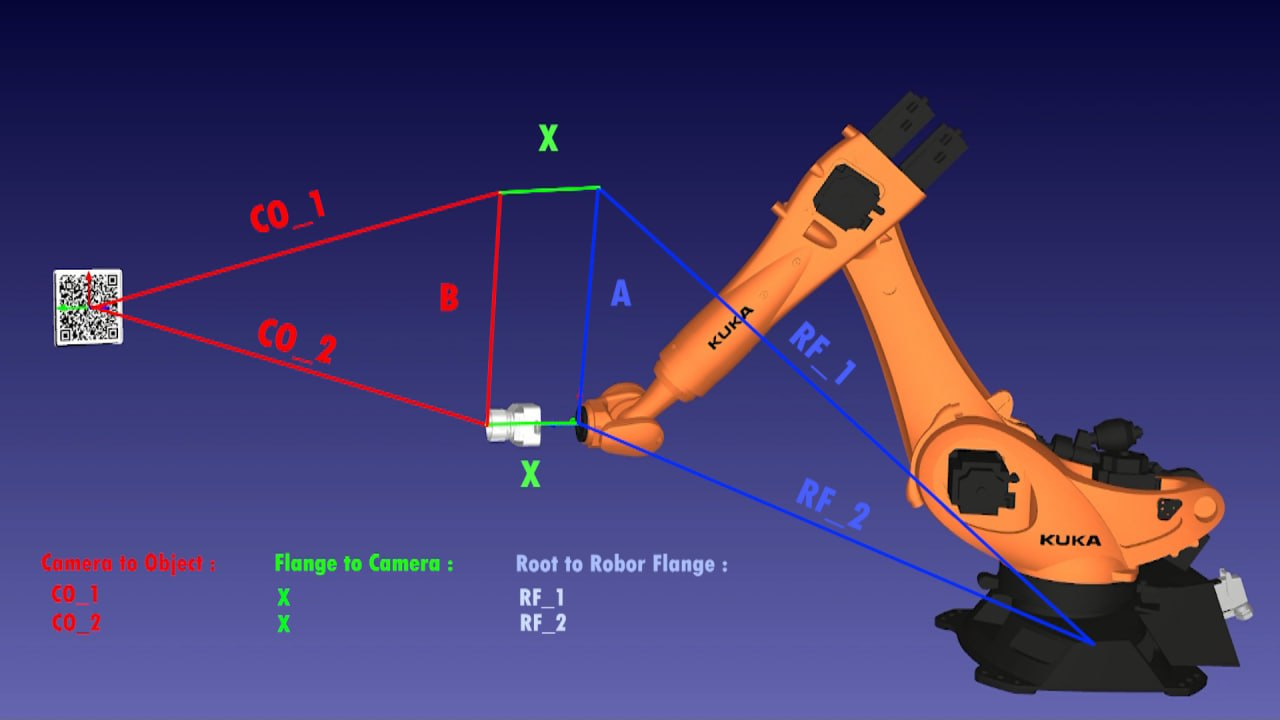

### And here we are getting the equasion in vector form. We can use this equasion for Loss function

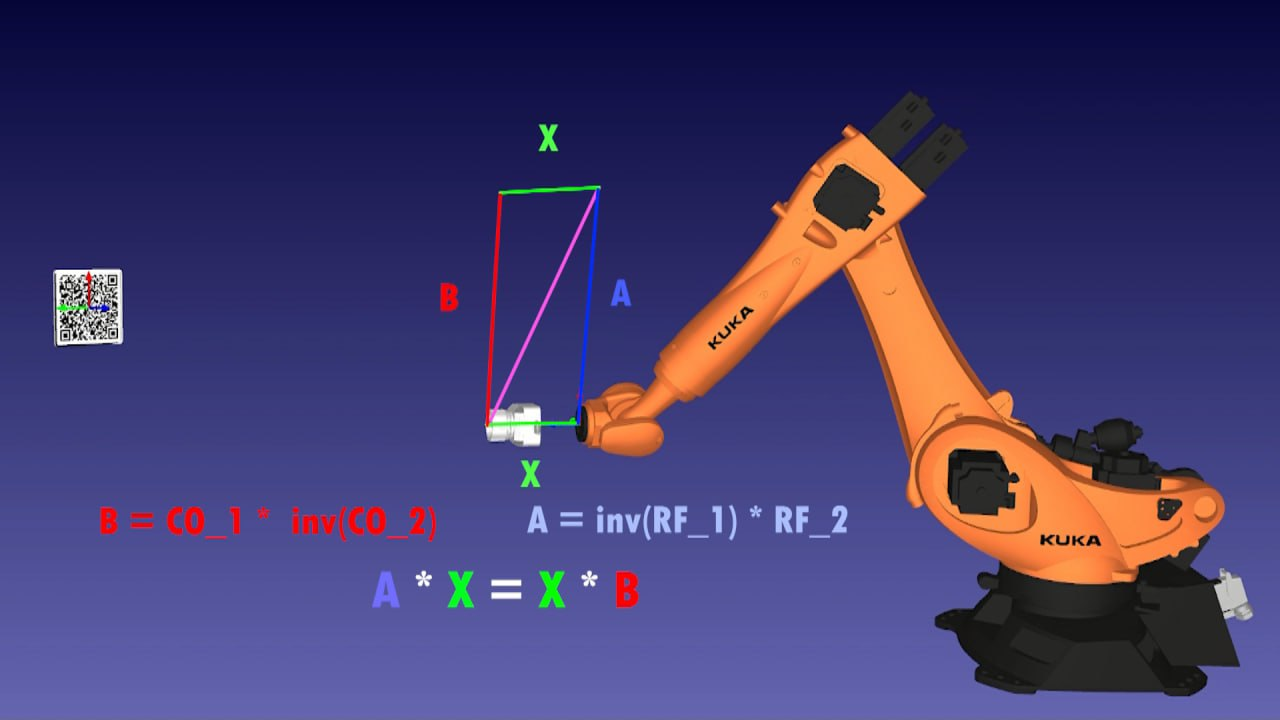

### BUILD VECTORS A , B from rob_frames_list, cam_frames_list

In [11]:
def build_kuka_fr(fr): # builds KUKA_frame from (x, y, z, a, b, c)
    kuka_fr = KUKA_frame(x= fr[0], y = fr[1], z = fr[2], a = fr[3], b = fr[4], c = fr[5])
    return kuka_fr
############
def build_kuka_fr_for_cam(fr): # builds KUKA_frame from (x, y, z, a, b, c)
    kuka_fr = KUKA_frame(x= fr[0], y = fr[1], z = fr[2], a = fr[5], b = fr[4], c = fr[3])
    return kuka_fr
##############

def build_rot_mtx_vec_A(kuka_fr_1, kuka_fr_2): 
    res_rot_mtx = kuka_fr_1.rot_mtx().inv() * kuka_fr_2.rot_mtx()
    return res_rot_mtx.mtx

def build_rot_mtx_vec_B(cam_fr_1, cam_fr_2): 
    res_rot_mtx = cam_fr_1.rot_mtx() * cam_fr_2.rot_mtx().inv()
    return res_rot_mtx.mtx
        

In [12]:
def make_unique_indexes(num_of_positions):
    indexes_arr = list()
    for i in range(num_of_positions):
        if i < num_of_positions:
            for j in range(i + 1, num_of_positions, 1):  
                indexes_arr.append((i, j))

    return indexes_arr       

def make_non_unique_indexes(num_of_positions):
    indexes_arr = list()
    for i in range(num_of_positions):        
        for j in range(num_of_positions): 
            if i != j:
                indexes_arr.append((i, j))

    return indexes_arr       

### Create np arrays of rotation matrices with shape [n_samples, 4, 4].    n_samples =  number of positions

In [13]:
# # ANOTHER VERSION OFOPTIMIZATION TRANSLATION
# BOULD NP ARRAY OF ROT MATRICES
def build_rot_mtx_arr_from_source(source_frames_list):
    data = np.empty(shape = (len(source_frames_list), 4, 4)).astype(np.float32)
    for i_num, i_fr in enumerate(source_frames_list):
        data[i_num] = build_kuka_fr(i_fr).rot_mtx().mtx
        
    return data
    
data_robot = build_rot_mtx_arr_from_source(rob_frames_list)
data_camera = build_rot_mtx_arr_from_source(cam_frames_list)
data_joined = np.concatenate((data_robot, data_camera), -1)
data_joined.shape

/tmp/ipykernel_36021/452383618.py:4: RuntimeWarning: overflow encountered in cast
  data = np.empty(shape = (len(source_frames_list), 4, 4)).astype(np.float32)


(90, 4, 8)

### Create datasets for A and B rotation matrices

In [14]:
# CREATE TF_DATASET BASED ON NP ARRAY OF ROT MATRICES
def create_dataset_shuffled(np_arr, buffer_size, batch_size ):
    train_dataset = tf.data.Dataset.from_tensor_slices(np_arr)
    train_dataset = train_dataset.shuffle(buffer_size).batch(batch_size) # DON'T use SHUFFLE - need use the same from A and B
    # train_dataset = train_dataset.batch(batch_size)
    return train_dataset
    
    
dataset_joined = create_dataset_shuffled(data_joined, buffer_size = data_joined.shape[0], batch_size = data_joined.shape[0]) #data_joined.shape[0])
dataset_joined

2025-04-01 14:31:39.971107: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-01 14:31:40.133825: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


<_BatchDataset element_spec=TensorSpec(shape=(None, 4, 8), dtype=tf.float32, name=None)>

In [15]:
def add_row(tf_var): 
    """
    Add row of [0, 0, 0, 1] at the bottom of x_mtx varible.
    Make it's shape [4,4] from [3,4]
    This is necessary to make multiplication of rotation matrices
    """
    a = tf.unstack(tf_var)
    row = tf.constant( np.array([0, 0, 0, 1]).astype(np.float32))
    a.append(row)
    tf_var = tf.stack(a)
    return tf_var

# def x_mtx_2_kuka_frame(x_mtx ):
#     """
#     From [4,4] shaped Rotation matrix -> getting KUKA_frame (X, Y, Z, A, B, C))
#     """
#     temp = np.zeros(shape=(4,4))
#     temp[:3, :] = x_mtx.numpy()
#     temp[3, :] = [0, 0, 0, 1]
#     x_mtx_obj = Rotation_matrix(mtx = temp, parent_type = 'KUKA')
#     x_fr = x_mtx_obj.extract_frame()
#     return np.array([x_fr.x, x_fr.y, x_fr.z, x_fr.a, x_fr.b, x_fr.c])

def x_mtx_2_kuka_frame(x_mtx ):
    """
    From [4,4] shaped Rotation matrix -> getting KUKA_frame (X, Y, Z, A, B, C))
    """
    temp = np.zeros(shape=(4,4))
    temp[:3, :] = x_mtx.numpy()
    temp[3, :] = [0, 0, 0, 1]
    x_mtx_obj = Rotation_matrix(mtx = temp, parent_type = 'KUKA')
    x_fr = x_mtx_obj.extract_frame()
    return np.array([x_fr.x * 1000, x_fr.y * 1000, x_fr.z * 1000, x_fr.a, x_fr.b, x_fr.c])

def plot_frame_history(x_fr_history ):
    """
    Visualization of evolving X, Y, Z, A, B, C during the all process of optimization
    """
    fig, axs = plt.subplots(3, 2, figsize=(120, 60))
    # for i, alpha in enumerate(np.linspace(0, 1, n)):
    #     curr_vec = v_1 * (1-alpha) + v_2 * alpha
    #     image = generate_data(curr_vec, generator)[0]
        # print(type(image))
    axs[0][0].set_title('X axis')
    axs[0][0].plot(x_fr_history[:, 0])
    
    axs[1][0].set_title('Y axis')
    axs[1][0].plot(x_fr_history[:, 1])
        
    axs[2][0].set_title('Z axis')
    axs[2][0].plot(x_fr_history[:, 2])

        
    axs[0][1].set_title('A angle')
    axs[0][1].plot(x_fr_history[:, 3])

    axs[1][1].set_title('B angle')
    axs[1][1].plot(x_fr_history[:, 4])

    axs[2][1].set_title('BCangle')
    axs[2][1].plot(x_fr_history[:, 5])
    # axs[0].axis('off')

### Description of the Train step and all Training process

In [16]:
# x = -130, y = 0, z = 100 
var = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
]).astype(np.float32)

# Create the main variable with shape [3, 4]. 
x_mtx = tf.Variable(var)


In [17]:
#Schedule for optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-1, #1e-1,
    decay_steps=30,
    decay_rate=0.8)

# Init optimizer
#opt = tf.keras.optimizers.legacy.Adam(learning_rate=lr_schedule, amsgrad = True) # learning_rate=0.5, amsgrad = True
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule, amsgrad = True) # learning_rate=0.5, amsgrad = True
# opt = tf.keras.optimizers.legacy.SGD(learning_rate=lr_schedule, momentum = 0.01) # learning_rate=0.5, amsgrad = True

# Init loss function

def loss(A_batch, B_batch, x_mtx):  
    
    tmp_x_mtx = add_row(x_mtx)
    # TRANSL LOSS
    ax = tf.linalg.matmul(A_batch, tmp_x_mtx, transpose_b=False) 
    axb = tf.linalg.matmul(ax, B_batch,  transpose_b=False)
    transl_axb = axb[:, :-1, -1] # shape[batch, 3]

    # calculation of euclidean distance
    b = tf.reshape(transl_axb, [-1,2, 3])
    substracted = tf.math.subtract(b[:, 0, :], b[:, 1, :])
    squared = tf.square(substracted)
    summed = tf.math.reduce_sum(squared, axis = 1)
    sqrtted = tf.math.sqrt(summed)
    loss_transl = tf.math.reduce_mean(sqrtted)

    # ROT LOSS
    




    
    
    return loss_transl

def train_step(x_mtx, loss_func, A_batch, B_batch):
    """
    Optimization step implemented without .fit()

    """
    #################################################
    with tf.GradientTape() as tape: # recording of the gradients from every step of optimization 
        loss = loss_func(A_batch, B_batch, x_mtx)
    
    grad = tape.gradient(loss, x_mtx) # dLoss/dImage
    opt.apply_gradients([(grad, x_mtx)]) # one step of gradient descent: image = image - lambda*dLoss/dImage                                         
    ###################################################
    return loss.numpy()

def train(x_mtx, loss_func, dataset, num_epochs = 1000):
    # init the iterators of DATASETs
    loss_history = list()
    x_fr_history = np.array([0,0,0,0,0,0])
    # datasetA_iterator = iter(dataset_A)
    # datasetB_iterator = iter(dataset_B)

    for epoch in range(num_epochs):
        # create batches of data
        for batch in dataset:   
            A_batch = batch[:, :, :4]
            B_batch = batch[:, :, 4:]
            loss_value = train_step(x_mtx, loss_func, A_batch, B_batch)
            
            
        loss_history.append(loss_value)
        x_fr_history = np.vstack( (x_fr_history, x_mtx_2_kuka_frame(copy.deepcopy(x_mtx)))) # add postprocessed x_mtx to history

        if epoch % 2 == 0:
            display.clear_output(wait=True)
            print('Epoch {}: loss: {}'.format(epoch, loss_value))
            print(x_mtx.numpy())
            plt.plot(loss_history)
            plt.show()

        

        if loss_value < 0.0001:
            break

    print(x_mtx_2_kuka_frame(x_mtx))
    return x_mtx_2_kuka_frame(x_mtx), loss_history, x_fr_history

### START TRAIN PROCESS 

Epoch 998: loss: 0.004724379163235426
[[ 0.00523317  0.296      -0.9698037  -0.11507004]
 [-1.0209086  -0.00988144 -0.0052254   0.0038099 ]
 [-0.01547534  0.97703236  0.34221533  0.09343805]]


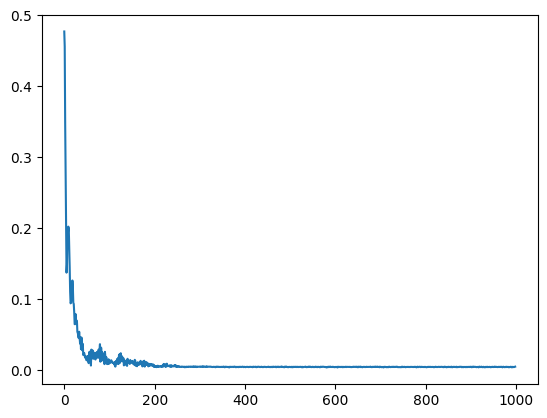

[-115.06828666    3.80779547   93.43973547  -89.70626548    0.86840189
   73.03017437]
CPU times: user 1min 6s, sys: 1min 23s, total: 2min 30s
Wall time: 50.7 s


In [18]:
%%time

# START TRAIN PROCESS 
result_kuka_frame, loss_history, x_fr_history = train(x_mtx, loss, dataset_joined, num_epochs= 1000)

In [19]:
# 1000 epochs
tmp_res = x_mtx_2_kuka_frame(x_mtx)
res_ = KUKA_frame(*tmp_res)
res_

<class '__main__.KUKA_frame'>
{'x': -115.06828665733337, 'y': 3.8077954668551683, 'z': 93.4397354722023, 'a': -89.70626548445185, 'b': 0.8684018862447365, 'c': 73.03017436907469}

![123](https://github.com/execbat/ml-dev/blob/main/AXXB123-ezgif.com-optimize.gif)

In [160]:
# 1000 epochs
tmp_res = x_mtx_2_kuka_frame(x_mtx)
res_ = KUKA_frame(*tmp_res)
res_

<class '__main__.KUKA_frame'>
{'x': -114.95771259069443, 'y': 3.9723138324916363, 'z': 92.95972436666489, 'a': -89.73559081236064, 'b': 0.8278501611193435, 'c': 73.05096268407893}

In [111]:
# 2000 epochs
tmp_res = x_mtx_2_kuka_frame(x_mtx)
res_ = KUKA_frame(*tmp_res)
res_

<class '__main__.KUKA_frame'>
{'x': -122.07342684268951, 'y': 0.4930783179588616, 'z': 98.44387322664261, 'a': -89.77709546377794, 'b': 0.5040364596456627, 'c': 72.48552987596075}

In [28]:
# 3000 epochs
tmp_res = x_mtx_2_kuka_frame(x_mtx)
res_ = KUKA_frame(*tmp_res)
res_

<class '__main__.KUKA_frame'>
{'x': -497.3245849609375, 'y': 16.767309188842773, 'z': 160.28305053710938, 'a': -95.37132616605614, 'b': 3.2586014624714283, 'c': 83.00693302258814}

In [30]:
# 4000 epochs
tmp_res = x_mtx_2_kuka_frame(x_mtx)
res_ = KUKA_frame(*tmp_res)
res_

<class '__main__.KUKA_frame'>
{'x': -512.116943359375, 'y': 16.249414443969727, 'z': 168.57501220703125, 'a': -95.80160038843302, 'b': 3.271835229951033, 'c': 83.85715338609444}

In [82]:
# 5000 epochs
tmp_res = x_mtx_2_kuka_frame(x_mtx)
res_ = KUKA_frame(*tmp_res)
res_

<class '__main__.KUKA_frame'>
{'x': -503.632568359375, 'y': 16.546464920043945, 'z': 163.81898498535156, 'a': -95.55118020885394, 'b': 3.264152617218966, 'c': 83.36590211407253}

In [86]:
print(res_.rot_mtx().mtx)

[[  -0.09657793    0.10951536   -0.98928211 -503.63256836]
 [  -0.99369543   -0.06746851    0.08953988   16.54646492]
 [  -0.0569394     0.99169269    0.11534088  163.81898499]
 [   0.            0.            0.            1.        ]]


In [85]:
np.set_printoptions(suppress=True)

In [92]:
tmp_res = x_mtx_2_kuka_frame(x_mtx)
res_ = KUKA_frame(*tmp_res)
res_

<class '__main__.KUKA_frame'>
{'x': -444.32708740234375, 'y': -13.306257247924805, 'z': 72.03186798095703, 'a': -47.14602751952509, 'b': 5.816071305161781, 'c': 110.37715172039776}

In [106]:
tmp_res = x_mtx_2_kuka_frame(x_mtx)
res_ = KUKA_frame(*tmp_res)
res_

<class '__main__.KUKA_frame'>
{'x': -732.6475830078125, 'y': 14.232927322387695, 'z': 280.1327209472656, 'a': 20.773125745413918, 'b': 75.11959896031297, 'c': -48.40823534062226}

In [159]:
tmp_res = x_mtx_2_kuka_frame(x_mtx)
res_ = KUKA_frame(*tmp_res)
res_

<class '__main__.KUKA_frame'>
{'x': -791.8458862304688, 'y': 0.18114671111106873, 'z': 368.1360778808594, 'a': -90.8197320978012, 'b': -19.406508342743614, 'c': 100.26322332981974}

In [161]:
tmp_res = x_mtx_2_kuka_frame(x_mtx)
res_ = KUKA_frame(*tmp_res)
res_

<class '__main__.KUKA_frame'>
{'x': -799.6400146484375, 'y': 1.5199451446533203, 'z': 376.32470703125, 'a': -89.63613463099897, 'b': -20.110066713699567, 'c': 100.5053390263622}

In [ ]:
-522.958, 15.869,  174.652,  -96.136,  3.282, 84.499

In [90]:
test_mtx = np.array([
[-0.2445,  -0.9657 , 0.0873 , 26.5],
[0.9173,  -0.2012  ,0.3436 , -15.5],
[-0.3142 , 0.1641 , 0.9351 , 705.5],
[0 , 0,  0,  1]
])

rot_mtx_obj = Rotation_matrix(mtx = test_mtx, parent_type = 'KUKA')
rot_mtx_obj
test_frame = rot_mtx_obj.extract_frame()
test_frame

<class '__main__.KUKA_frame'>
{'x': 26.5, 'y': -15.5, 'z': 705.5, 'a': 104.92480799579725, 'b': 18.313083004974242, 'c': 9.953607188579769}

In [ ]:
[26.5, -15.5, 705.5, 9.95344, 18.3125, 104.925],

In [55]:
import random 
n_samples = 10

indexes = random.sample(range(len(cam_frames_list)), n_samples)
indexes

[1, 21, 2, 13, 29, 15, 24, 19, 39, 26]

In [61]:
[cam_frames_list[ind] for ind in indexes]

[[148, 1, 582.5, 6.23901, -18.0954, -20.3987],
 [-25, 48.75, 649.75, 25.726, 17.6559, 162.358],
 [91.25, -73.5, 427.5, 4.5009, -19.6577, -51.6357],
 [24.75, -44.5, 622.75, -14.953, 19.7125, 89.8478],
 [-102.5, -64, 839.75, 22.358, -21.7218, -143.721],
 [42.25, -82.75, 511.75, -15.6608, 25.2773, 88.9925],
 [-1, 66, 648.5, 31.1899, 5.71614, -173.206],
 [-73.5, -55.5, 589.75, 12.2869, 17.1036, 124.561],
 [14.5, -87.25, 424.75, 26.956, -4.99104, 173.105],
 [-22.25, -24, 809.5, 37.8115, 3.65796, -173.169]]

In [175]:
cam_frames_list
rob_frames_list

[[1507.34363, -221.44925, 2067.93555, -164.93109, 66.19657, 180.0],
 [1970.31128, 236.77966, 1301.53845, 70.18229, -8.13688, 88.92815],
 [1561.31751, -241.4837, 974.88123, 85.13561, -70.208, 99.94567],
 [1904.86438, -596.74658, 1719.98706, 120.29778, 5.73364, 111.18403],
 [1673.39014, -857.09711, 1509.50867, 100.26297, -18.72506, 105.85829],
 [1902.10771, -92.65591, 1658.77306, 90.81134, -15.91346, 108.67867],
 [1764.02292, 0.0, 1761.52636, -180.0, 84.0, -180.0],
 [2322.09131, -181.78218, 1120.96753, 99.78435, -49.31644, 88.20804],
 [2342.28769, 252.65205, 1452.60974, -100.15287, 75.10792, -94.09057],
 [2306.00586, 402.15448, 1736.193, 57.17004, -41.10065, 108.74191]]

In [68]:
# counter = 0

# for A_batch,  B_batch in zip(dataset_A, dataset_B):
    
#     print(A_batch)
#     print()
#     counter += 1

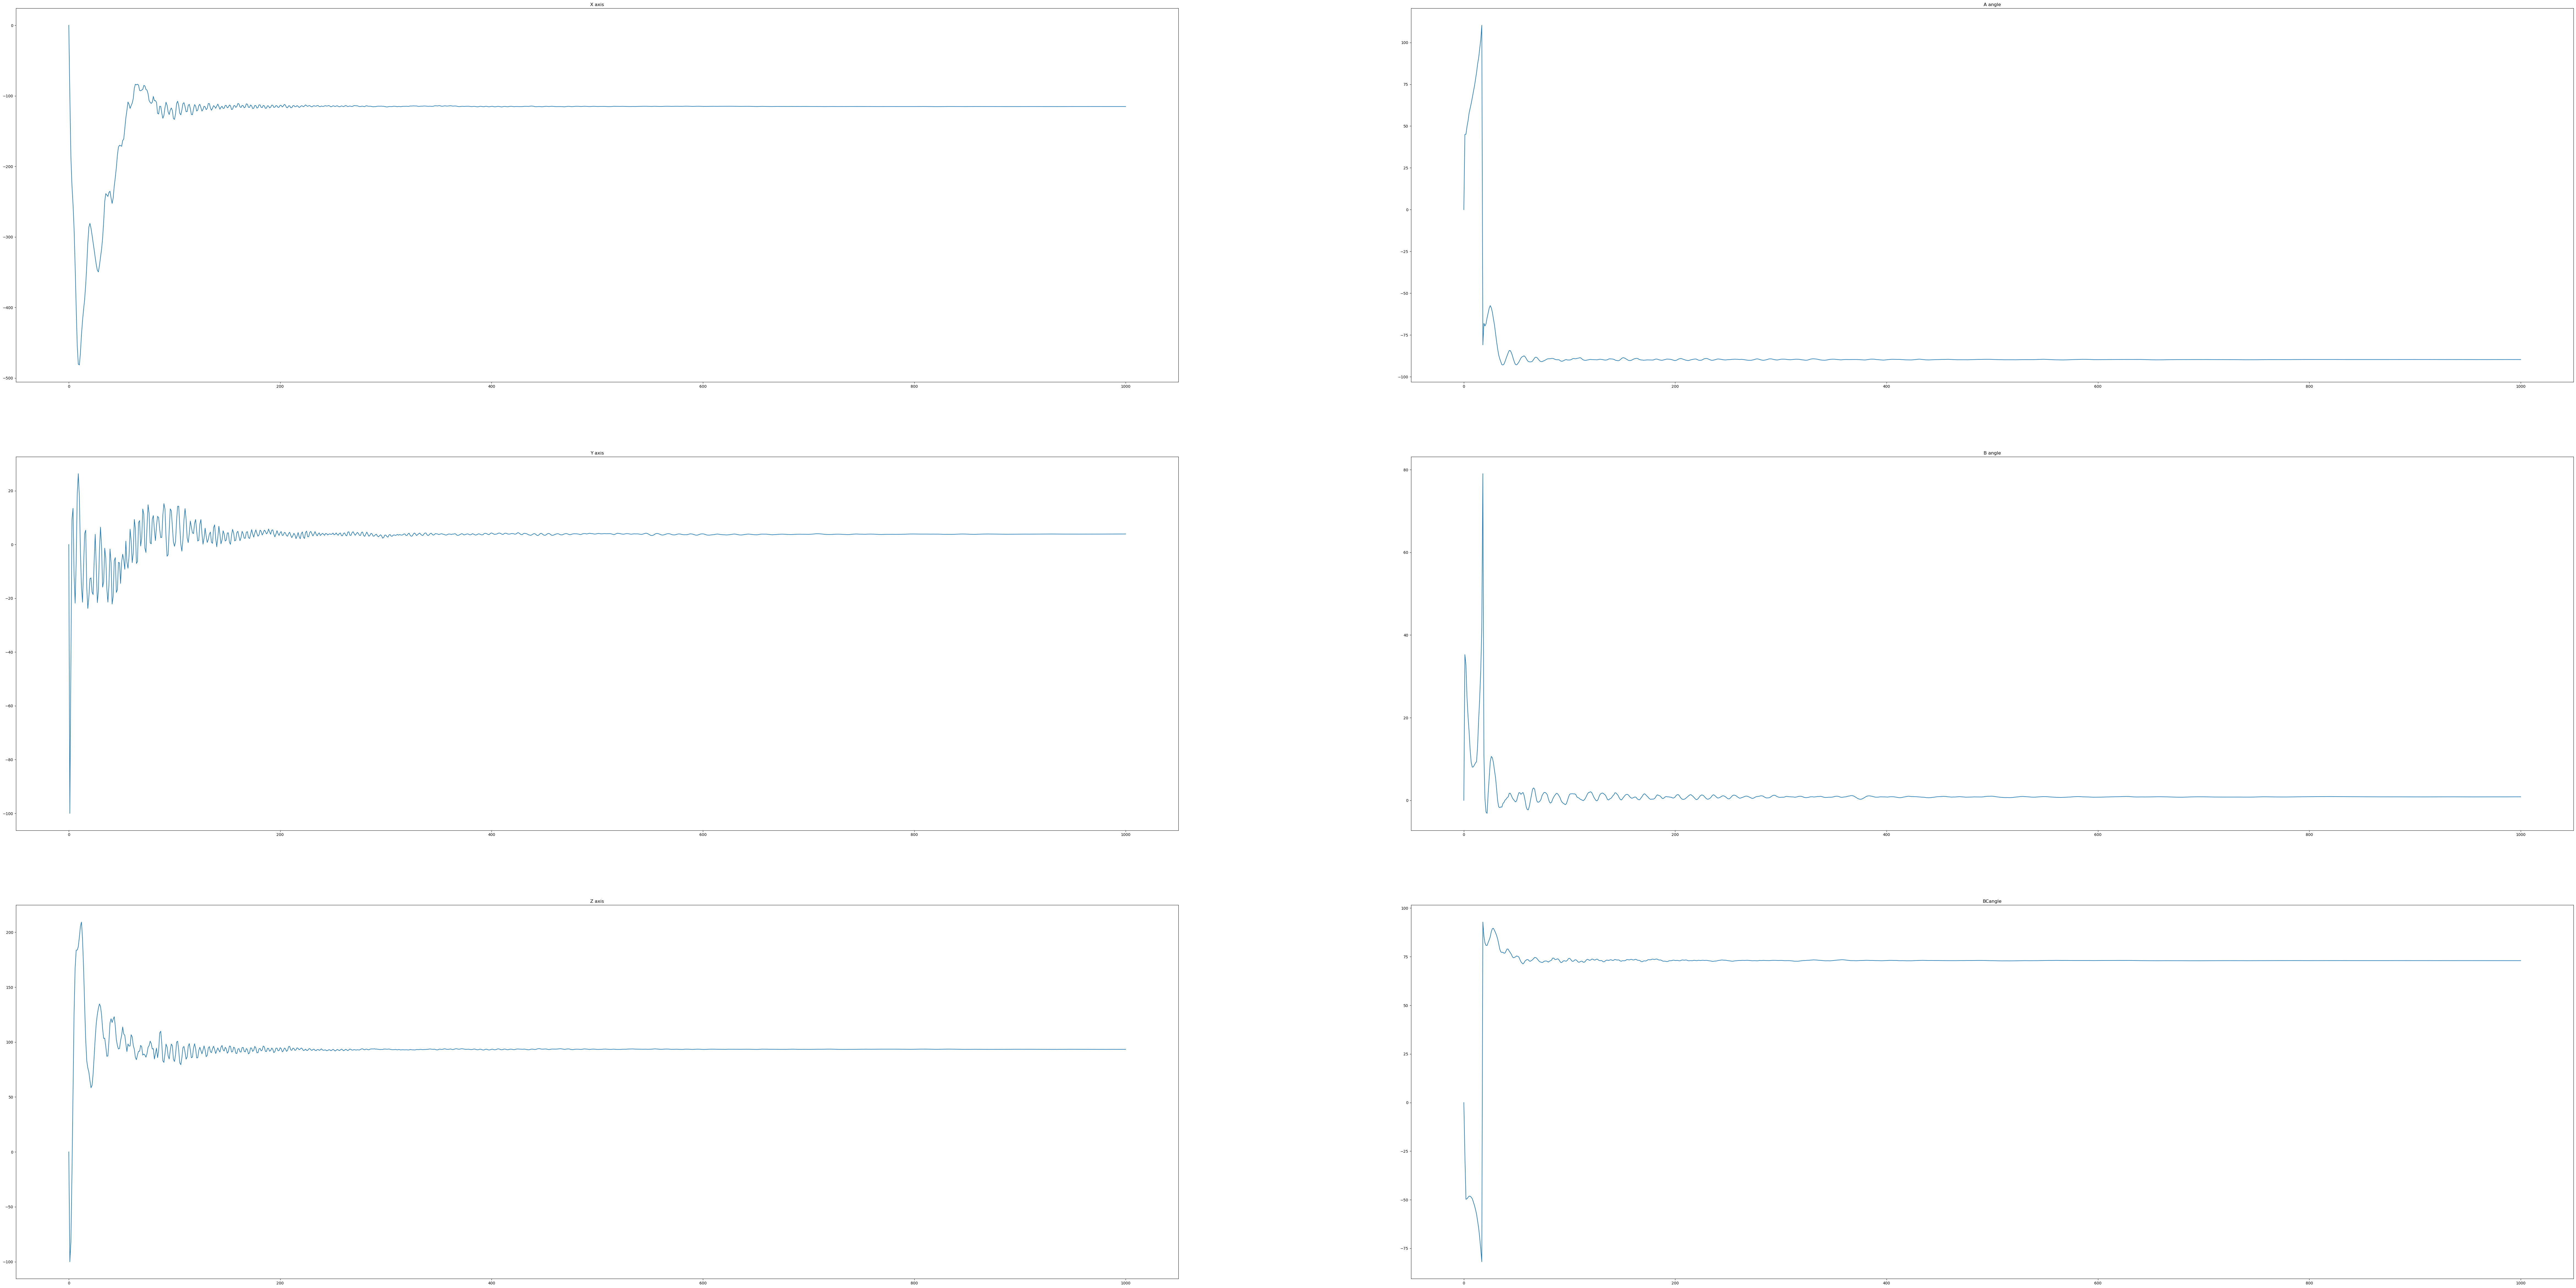

In [20]:
plot_frame_history(x_fr_history)

In [96]:
source = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],    
])

weights = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1],    
])

source.dot(weights)

array([[ 1,  2,  5],
       [ 4,  5, 11],
       [ 7,  8, 17]])

In [77]:
# counter = 0


# with open('aftermastering_camera_06_04', 'r') as file:
#     for num_line, line in enumerate(file):
#         if num_line % 4 == 0:
#             new_line = '[' + line.replace('  ', ' ,')[1:-1] + ']'
#             new_line1 = np.array(eval(new_line))
#             # print(new_line)

#         if num_line % 4 == 1:
#             new_line = '[' + line.replace('  ', ' ,')[:-1] + ']'
#             new_line2 = np.array(eval(new_line))
            
#             # print(new_line)

#         if num_line % 4 == 2:
#             new_line = '[' + line.replace('  ', ' ,')[:-1] + ']'
#             new_line3 = np.array(eval(new_line))
            
#             # print(new_line)

#         if num_line % 4 == 3:
#             new_line = '[' + line.replace('  ', ' ,')[:-3] + ']'
#             new_line4 = np.array(eval(new_line))
            
#             # print(new_line)
#         counter += 1
#         if counter > 0 and (counter % 4 == 0):    
#             mtx = np.vstack([new_line1, new_line2, new_line3, new_line4])
#             frame = Rotation_matrix(mtx = mtx, parent_type = 'KUKA').extract_frame()
#             print(frame.to_tuple())
#             # print(mtx)
        
#         # print(line)

In [9]:
# PARSE robot file from Niall
filename = 'robot'
accum = []
lines = []
with open(filename, 'r') as t_file:
    for line in t_file:      
        if line.startswith('['):
        #     pointer1 = line.find('{')
        #     pointer2 = line.find(',S')
        #     line = line[pointer1 + 1: pointer2]
        #     line = ''.join(c for c in line if c not in ['X', 'Y', 'Z', 'A', 'B', 'C'])
            line = line[:-2]
            line = eval(line)
            # print(type(line))
            lines.append(line)
            # print(line)



rob_frames_list = lines

mm_to_meters = lambda x : [x[0]/1000, x[1]/1000, x[2]/1000, x[3], x[4], x[5]]
rob_frames_list =  list(map(mm_to_meters, rob_frames_list))

for i in rob_frames_list:
   print(i) 
len(rob_frames_list)

[0.502541, 0.748904, 1.7479, -54.6528, -37.5408, -65.5671]
[0.428404, 0.6239880000000001, 1.6324100000000001, -52.1734, -16.0038, -73.9552]
[0.488101, 0.6239880000000001, 1.6324100000000001, -49.2512, -16.0037, -73.9552]
[0.311342, 0.686331, 1.38624, -60.4734, 19.2803, -109.069]
[0.201339, 0.697986, 1.13771, -69.989, 39.4701, -119.758]
[0.21591, 0.736595, 1.21074, -85.4455, 42.2869, -163.951]
[-0.0048145, 0.7805639999999999, 1.30176, -109.174, 39.9899, 169.502]
[-0.0429645, 0.845932, 1.1636, -129.138, 44.8589, 132.42]
[-0.176761, 0.712073, 1.3744, -140.613, 22.7543, 113.093]
[-0.24893, 0.662538, 1.47631, -146.012, 6.9202, 92.8864]
[-0.25233, 0.803593, 1.7753299999999999, -149.466, -17.3238, 87.0682]
[-0.29616000000000003, 0.721407, 1.79456, -149.662, -29.8532, 61.878]
[-0.104902, 0.644714, 1.79181, -128.239, -38.7863, 32.3781]
[0.030076899999999997, 0.712896, 1.9595799999999999, -109.528, -53.836, 10.0759]
[0.23086099999999998, 0.6844669999999999, 1.73026, -77.345, -40.3959, -26.2613]


90

In [10]:
# GET CAM-OBSERVATIONS FROM sourse file

filename = 'camera'
accum = []
rot_marrices = []
with open(filename, 'r', encoding = 'utf8') as t_file:
    for l_num, line in enumerate(t_file):
        # print(line)
        if len(line) > 10:
            if l_num % 4 == 0:
                line = line.replace('  ', ', ')
                line = line[:-1] + ']'
                # print(line)
    
            elif l_num % 4 == 1:
                line = line.replace('  ', ', ')
                line = '[' + line[:-1] + ']'
                # print(line)
    
            elif l_num % 4 == 2:
                line = line.replace('  ', ', ')
                line = '[' + line[:-1] + ']'
                # print(line)
    
            elif l_num % 4 == 3:
                line = line.replace('  ', ', ')
                line = '[' + line[:-2] 
                # print(line)
    
            # print(line)
            row = eval(line)
            row = np.array(row)
            # print(type(row))
    
    
            accum.append(row)
            if len(accum) == 4:
                mtx = np.vstack(accum)
                rot_marrices.append(mtx)
                accum = []

cam_frames_list = [Rotation_matrix(mtx = elem, parent_type = 'KUKA').extract_frame().to_list() for elem in rot_marrices]
# [print(elem) for elem in cam_frames_list]
len(cam_frames_list)


mm_to_meters = lambda x : [x[0]/1000, x[1]/1000, x[2]/1000, x[3], x[4], x[5]]
cam_frames_list =  list(map(mm_to_meters, cam_frames_list))

for i in cam_frames_list:
   print(i) 
len(cam_frames_list)

[0.17225, 0.0325, 0.71, 131.503713, 32.547271, 15.771177]
[-0.00525, 0.08475, 0.79475, 113.337247, 21.05129, 4.501308]
[-0.001, 0.07925, 0.809, 113.495026, 25.373297, 4.774893]
[-0.0175, 0.0635, 0.7265, 62.533264, 12.14603, -9.203841]
[-0.02675, 0.045, 0.77975, 45.052807, 4.157566, -25.43966]
[-0.00275, 0.00775, 0.725, 9.595691, 5.204113, -21.019867]
[0.04275, 0.04425, 0.68475, -7.178708, -11.613586, -14.29086]
[0.04475, 0.034, 0.68575, -32.710149, -12.937491, -22.864317]
[0.03575, 0.08825, 0.7885, -58.687431, -15.539625, -2.40829]
[0.05, 0.0995, 0.852, -85.13662, -15.480719, 4.33055]
[0.029, 0.04875, 0.78175, -107.879443, -19.499956, 22.074554]
[0.04, 0.113, 0.8615, -134.949437, -15.949737, 19.041167]
[0.05175, 0.0905, 0.84725, -157.912828, -3.795675, 17.474611]
[0.004, 0.08075, 0.81625, -174.662896, 0.968367, 27.347888]
[-0.012, 0.0995, 0.74, 161.006508, 10.608594, 4.121071]
[0.05175, -0.03175, 0.7165, 162.794806, 2.550518, 19.85946]
[0.05125, 0.0805, 0.756, -173.421138, -6.217153, 8

90

In [19]:
x_fr_history[-1]

array([-115.12026191,    3.92570253,   93.42965484,  -89.71411726,
          0.86789482,   72.97653108])

In [25]:
samples = [0, 3, 7, 12, 20, 35, 65, 100,-1]

In [8]:
for i in x_fr_history:
    print(i.tolist())

NameError: name 'x_fr_history' is not defined